In [47]:
import os
import cv2
import glob
import tqdm
import time
import torch
import random
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [26]:
random.seed(42)

In [27]:
pytesseract.pytesseract.tesseract_cmd = r"C:/Program Files/Tesseract-OCR/tesseract.exe"

In [63]:
labelMap = {3: 'Miscellaneous Category - Miscellaneous Bills',
            7: 'Travel Category - Flight Ticket',
            0: 'Electronics Category - Electronic Gadgets Bill/Receipt',
            8: 'Travel Category - Train Ticket',
            6: 'Travel Category - Cab Bill/Receipt',
            4: 'Room Stay Category - Stay Bill/Receipt',
            5: 'Travel Category - Bus Ticket',
            1: 'Food Category - Restaurant Bill/Receipt',
            2: 'Fuel Category - Fuel Bill/Receipt'}

In [28]:
imgFiles = [glob.glob("../sampleData/"+y) for y in ['*.jpg', '*.png', '*.tiff', '*.bmp', '*.jpeg']]
imgFiles = sum(imgFiles , [])
imgFiles

['../sampleData\\busTickets_2.png',
 '../sampleData\\busTickets_3.png',
 '../sampleData\\busTickets_4.png',
 '../sampleData\\cabBills_49.png',
 '../sampleData\\cabBills_50.png',
 '../sampleData\\cabBills_51.png',
 '../sampleData\\flightTickets_10.png',
 '../sampleData\\flightTickets_11.png',
 '../sampleData\\flightTickets_9.png',
 '../sampleData\\fuelBills_140.png',
 '../sampleData\\fuelBills_141.png',
 '../sampleData\\fuelBills_142.png',
 '../sampleData\\gadgetsBills_10.png',
 '../sampleData\\gadgetsBills_15.png',
 '../sampleData\\gadgetsBills_9.png',
 '../sampleData\\restaurantBills_17.png',
 '../sampleData\\restaurantBills_18.png',
 '../sampleData\\restaurantBills_19.png',
 '../sampleData\\stayReceipts_11.png',
 '../sampleData\\stayReceipts_12.png',
 '../sampleData\\stayReceipts_13.png',
 '../sampleData\\trainTickets_20.png',
 '../sampleData\\trainTickets_21.png',
 '../sampleData\\trainTickets_22.png']

In [29]:
imgName = imgFiles[7]
imgName

'../sampleData\\flightTickets_11.png'

In [30]:
img = cv2.imread(imgName, 0)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

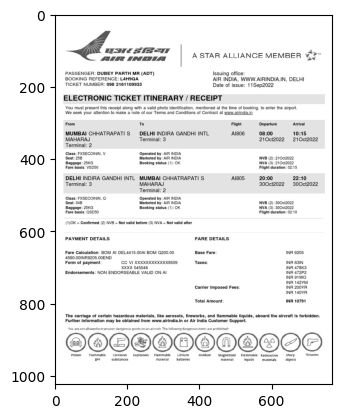

In [31]:
plt.imshow(img, cmap = "gray")

In [32]:
txtOut = pytesseract.image_to_string(img)
txtOut

'guint A STAR ALLIANCE MEMBER we =\n\nSEMEE TAPER ee\nPASSENGER: DUBEY PARTH MR (ADT) Issuing office:\nBOOKING REFERENCE: LAH9QA, AIR INDIA, WWW.AIRINDIA.IN, DELHI\nTICKET NUMBER: 098 2161109933 Date of issue: 11Sep2022\n\nELECTRONIC TICKET ITINERARY / RECEIPT\n\n‘You must present this receipt along with a valid photo identification, mentioned at the time of booking, to enter the airport.\nWe seek your attention to make a note of our Terms and Conditions of Contract at www.alrindia.in\n\nFrom To Fright Departure Arrival\n\nMUMBAI CHHATRAPATIS DELHI INDIRA GANDHI INTL. Als06 08:00 10:15\n\nMAHARAJ Terminal: 3 21012022 210ct2022\n\nTerminal: 2\n\nClass: FXSECOININ, V Operated by: AIR INDIA\n\n‘Seat: 258 Marketed by: AIR INDIA NVB (2): 21002022\n\nBaggage: 25KG Booking status (1): 0K NVA (3): 210012022\n\nFare basis: VSDS0 Flight duration: 02:15\n\nDELHI INDIRA GANDHI INTL MUMBAI CHHATRAPATI S Alg05 20:00 22:40\n\nTerminal: 3 MAHARAJ 300ct2022 — 300ct2022\nTerminal: 2\n\nClass: FXSECOININ

In [41]:
modelPath = "T:\\OpenSourceContribution\\LMstuff\\modelTraining\\modelMobileBERT\\withoutLoRA\\trainedMobileBERT"

In [44]:
model = AutoModelForSequenceClassification.from_pretrained(modelPath)

In [45]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

MobileBertForSequenceClassification(
  (mobilebert): MobileBertModel(
    (embeddings): MobileBertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 512)
      (token_type_embeddings): Embedding(2, 512)
      (embedding_transformation): Linear(in_features=384, out_features=512, bias=True)
      (LayerNorm): NoNorm()
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): MobileBertEncoder(
      (layer): ModuleList(
        (0-23): 24 x MobileBertLayer(
          (attention): MobileBertAttention(
            (self): MobileBertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=512, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): MobileBertSelfOutput(
              (dense): Linear(in_fe

In [48]:
tokenizer = AutoTokenizer.from_pretrained("google/mobilebert-uncased")

c:\Users\Sid\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [51]:
txtOut

'guint A STAR ALLIANCE MEMBER we =\n\nSEMEE TAPER ee\nPASSENGER: DUBEY PARTH MR (ADT) Issuing office:\nBOOKING REFERENCE: LAH9QA, AIR INDIA, WWW.AIRINDIA.IN, DELHI\nTICKET NUMBER: 098 2161109933 Date of issue: 11Sep2022\n\nELECTRONIC TICKET ITINERARY / RECEIPT\n\n‘You must present this receipt along with a valid photo identification, mentioned at the time of booking, to enter the airport.\nWe seek your attention to make a note of our Terms and Conditions of Contract at www.alrindia.in\n\nFrom To Fright Departure Arrival\n\nMUMBAI CHHATRAPATIS DELHI INDIRA GANDHI INTL. Als06 08:00 10:15\n\nMAHARAJ Terminal: 3 21012022 210ct2022\n\nTerminal: 2\n\nClass: FXSECOININ, V Operated by: AIR INDIA\n\n‘Seat: 258 Marketed by: AIR INDIA NVB (2): 21002022\n\nBaggage: 25KG Booking status (1): 0K NVA (3): 210012022\n\nFare basis: VSDS0 Flight duration: 02:15\n\nDELHI INDIRA GANDHI INTL MUMBAI CHHATRAPATI S Alg05 20:00 22:40\n\nTerminal: 3 MAHARAJ 300ct2022 — 300ct2022\nTerminal: 2\n\nClass: FXSECOININ

In [52]:
encodedData = tokenizer(txtOut, padding="max_length", truncation=True, max_length=512)

In [56]:
input_ids = torch.tensor([encodedData["input_ids"]], dtype=torch.uint8).to(device).long()
attention_mask = torch.tensor([encodedData["attention_mask"]], dtype=torch.uint8).to(device)

In [93]:
with torch.no_grad():
  outputs = model(input_ids=input_ids, attention_mask=attention_mask)
  logits = outputs.logits
  predOut = torch.argmax(logits, dim=1)

In [68]:
logits

tensor([[-2.2719, -3.1325, -3.7281, -4.0311, -0.3071,  2.0787, -2.7808, 11.2745,
         -1.4094]], device='cuda:0')

In [95]:
confVals = torch.nn.functional.softmax(logits, dim=1)
confVals

tensor([[1.3087e-06, 5.5343e-07, 3.0508e-07, 2.2533e-07, 9.3356e-06, 1.0146e-04,
         7.8675e-07, 9.9988e-01, 3.1003e-06]], device='cuda:0')

In [97]:
labelMap[predOut.item()]

'Travel Category - Flight Ticket'

In [98]:
confVals[0, predOut.item()]

tensor(0.9999, device='cuda:0')